In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
df['Wage'] = df['Wage'].str.extract(r'(\d+)').astype('int64')
df['Value'] = df['Value'].str.extract(r'(\d+)').astype('int64')

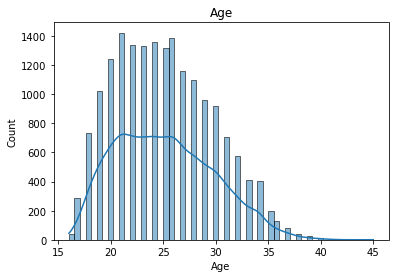

In [8]:
plt.title("Age")
sns.histplot(data=df, x='Age',kde=True);

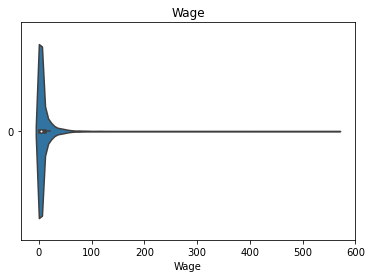

In [9]:
plt.title("Wage")
plt.xlabel("Wage")
sns.violinplot(data=df['Wage'], orient="h");

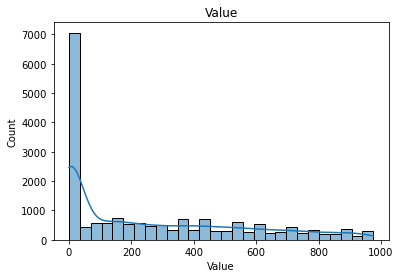

In [10]:
plt.title("Value")
sns.histplot(data=df, x='Value',kde=True);

In [11]:
cc1 = df[['Wage','Age', 'Value']].corr(method = 'spearman')
cc2 = df[['Wage','Age', 'Value']].corr(method = 'pearson')

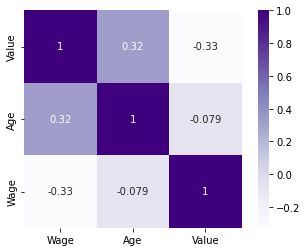

In [12]:
sns.heatmap(data=cc1,xticklabels=['Wage','Age', 'Value'], yticklabels=['Value','Age', 'Wage'], square=True,annot = True, cmap='Purples');

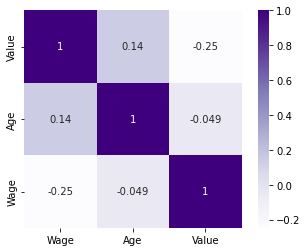

In [13]:
sns.heatmap(data=cc2,xticklabels=['Wage','Age', 'Value'], yticklabels=['Value','Age', 'Wage'], square=True,annot = True, cmap='Purples');

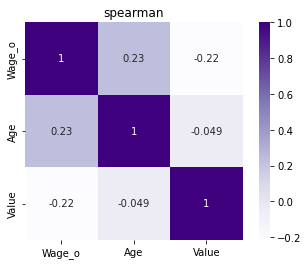

In [14]:
dft = df[['Wage','Age', 'Value']].quantile([0.25,0.75])
cols = ['Wage_o','Age', 'Value']
IQR = dft.quantile(0.75) - df[['Wage','Age', 'Value']].quantile(0.25)

df['Wage_o'] = df['Wage'][(df['Wage'] <= dft.loc[0.75,'Wage']+1.5*IQR["Wage"])&(df['Wage'] >= dft.loc[0.25,'Wage']-1.5*IQR["Wage"])]

cc1 = df[cols].corr(method = 'spearman')
cc2 = df[cols].corr(method = 'pearson')
plt.title("spearman")
sns.heatmap(data=cc2,xticklabels=cols, yticklabels=cols, square=True,annot = True, cmap='Purples');

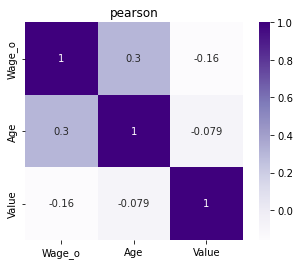

In [15]:
plt.title("pearson")
sns.heatmap(data=cc1,xticklabels=cols, yticklabels=cols, square=True,annot = True, cmap='Purples');

In [19]:
df = pd.read_excel('exce1.xlsx')
df

,Campaign,Meals
0,2010,40139
1,2011,127020
2,2012,168193
3,2013,153115
4,2014,202102
5,2015,232897
6,2016,277912
7,2017,205350
8,2018,233389
9,2019,232797


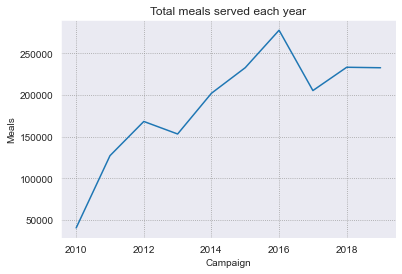

In [24]:
plt.title("Total meals served each year")
plt.style.use('ggplot')
sns.lineplot(data=df, x='Campaign', y='Meals');

## Comment
Số lượng phần ăn mỗi năm có xu hướng tăng dần và đạt đỉnh vào năm 2016 có thể do các nguyên nhân sau:
- Điều này có thể là do ảnh hưởng của nền kinh tế khiến cho số lượng người vô gia cư tăng
- Số tiền cho quỹ từ thiện được tăng cao kéo theo chất lượng và số lượng bữa ăn được từ thiện cũng tăng theo

In [27]:
df = pd.read_excel('2.5 EXERCISE.xlsx')
df

,Year,Attrition Rate
0,2019,0.091
1,2018,0.082
2,2017,0.045
3,2016,0.123
4,2015,0.056
5,2014,0.151
6,2013,0.070
7,2012,0.010
8,2011,0.020
9,2010,0.097


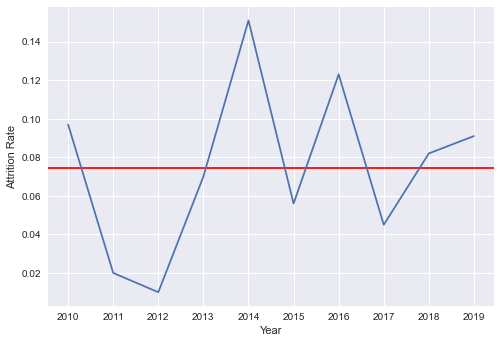

In [52]:
plt.style.use('seaborn')
plt.xticks(df['Year'])
plt.axhline(y=df['Attrition Rate'].mean(),color='red')
sns.lineplot(data=df, x='Year', y='Attrition Rate');

## Comment
- Attrition rate là tỉ lệ người làm công hoặc số lượng khách hàng mất đi và tạm thời chưa thể thay được của 1 doanh nghiệp
- 2012 là năm mà tỉ lệ đạt giá trị thấp nhất và 2014 là năm tỉ lệ đạt mức cao nhất
- Từ dữ liệu, ta chưa thể rút ra được xu hướng chung của tỉ lệ này

In [55]:
!ls

'2.5 EXERCISE.xlsx'   data.csv	 exce1.xlsx   fifa.csv	 w6.ipynb


In [57]:
df = pd.read_csv('fifa.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [58]:
df['Wage'] = df['Wage'].str.extract(r'(\d+)').astype('int64')
df['Value'] = df['Value'].str.extract(r'(\d+)').astype('int64')

In [59]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

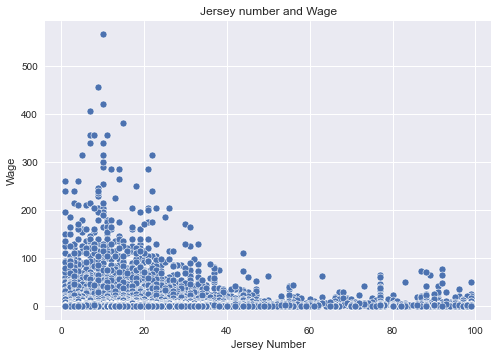

In [71]:
plt.title('Jersey number and Wage')
sns.scatterplot(data=df, x='Jersey Number', y='Wage');

## Comment
Số áo của cầu thủ có phần liên qua đến mức lương của cầu thủ vì các <br> 
CLB thường ưu tiên các cầu thủ chủ chốt (lương cao) với số áo nhỏ

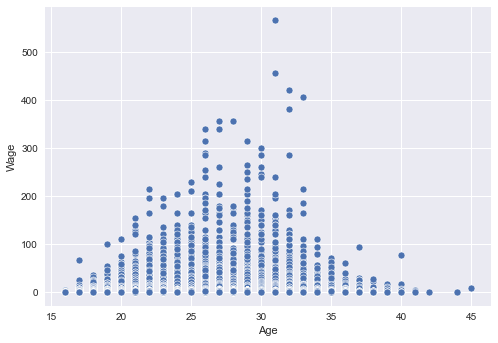

In [72]:
sns.scatterplot(data=df, x='Age', y='Wage');

## Comment
Ta có thể thấy thời điểm vàng của các cầu thủ thường là ở độ tuổi <br>
25 - 33 khi mà các cầu thủ có mức lương cao

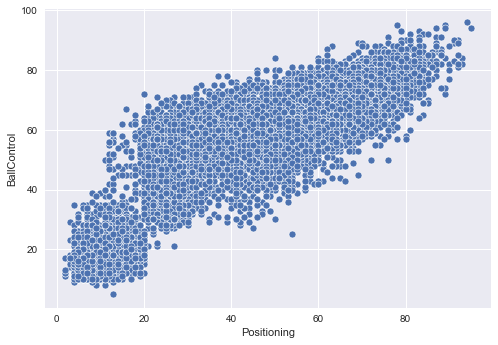

In [88]:
sns.scatterplot(data=df, x='Positioning', y='BallControl');

In [81]:
df.groupby(by='Nationality')

0        96.0
1        94.0
2        95.0
3        42.0
4        91.0
         ... 
18202    43.0
18203    40.0
18204    44.0
18205    52.0
18206    51.0
Name: BallControl, Length: 18207, dtype: float64